# Correlation analysis between regions
- Pearson Correlation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

In [2]:
df = pd.read_csv('D:\git_space\COVID-19-prediction-project\data\kr_regional_daily.csv')
df = df.drop(['date', 'region', 'death', 'released'], axis=1)

df_list = df['confirmed'].tolist()

In [3]:
Seoul = []
Pusan = []
Daegu = []
Incheon = []
Gwangju = []
Daejeon = []
Ulsan = []
Sejong = []
Gyeonggi = []
Gangwon = []
Chungbuk = []
Chungnam = []
Jeonbuk = []
Jeonnam = []
Gyeongbuk = []
Gyeongnam = []
Jeju = []
Overseas = []

for i in range(len(df_list)):
  if i % 18 == 0:
    Seoul.append(df_list[i])

  elif i % 18 == 1:
    Pusan.append(df_list[i])
    
  elif i % 18 == 2:
    Daegu.append(df_list[i])
    
  elif i % 18 == 3:
    Incheon.append(df_list[i])
    
  elif i % 18 == 4:
    Gwangju.append(df_list[i])
    
  elif i % 18 == 5:
    Daejeon.append(df_list[i])
    
  elif i % 18 == 6:
    Ulsan.append(df_list[i])
    
  elif i % 18 == 7:
    Sejong.append(df_list[i])
    
  elif i % 18 == 8:
    Gyeonggi.append(df_list[i])
    
  elif i % 18 == 9:
    Gangwon.append(df_list[i])
    
  elif i % 18 == 10:
    Chungbuk.append(df_list[i])
    
  elif i % 18 == 11:
    Chungnam.append(df_list[i])
    
  elif i % 18 == 12:
    Jeonbuk.append(df_list[i])
    
  elif i % 18 == 13:
    Jeonnam.append(df_list[i])
    
  elif i % 18 == 14:
    Gyeongbuk.append(df_list[i])
    
  elif i % 18 == 15:
    Gyeongnam.append(df_list[i])
    
  elif i % 18 == 16:
    Jeju.append(df_list[i])
    
  elif i % 18 == 17:
    Overseas.append(df_list[i])

In [4]:
Seoul = pd.DataFrame(Seoul, columns=['confirmed'])
Pusan = pd.DataFrame(Pusan, columns=['confirmed'])
Daegu = pd.DataFrame(Daegu, columns=['confirmed'])
Incheon = pd.DataFrame(Incheon, columns=['confirmed'])
Gwangju = pd.DataFrame(Gwangju, columns=['confirmed'])
Daejeon = pd.DataFrame(Daejeon, columns=['confirmed'])
Ulsan = pd.DataFrame(Ulsan, columns=['confirmed'])
Sejong = pd.DataFrame(Sejong, columns=['confirmed'])
Gyeonggi = pd.DataFrame(Gyeonggi, columns=['confirmed'])
Gangwon = pd.DataFrame(Gangwon, columns=['confirmed'])
Chungbuk = pd.DataFrame(Chungbuk, columns=['confirmed'])
Chungnam = pd.DataFrame(Chungnam, columns=['confirmed'])
Jeonbuk = pd.DataFrame(Jeonbuk, columns=['confirmed'])
Jeonnam = pd.DataFrame(Jeonnam, columns=['confirmed'])
Gyeongbuk = pd.DataFrame(Gyeongbuk, columns=['confirmed'])
Gyeongnam = pd.DataFrame(Gyeongnam, columns=['confirmed'])
Jeju = pd.DataFrame(Jeju, columns=['confirmed'])
Overseas = pd.DataFrame(Overseas, columns=['confirmed'])

In [5]:
def make_diff(dataframe):
    
    df_list = dataframe['confirmed'].tolist()
    diff = []

    for i in range(len(df_list)):
        if i != 0:
            diff.append(df_list[i] - df_list[i - 1])

    sub = [1]
    diff = sub + diff

    diff = pd.DataFrame(diff, columns=['confirmed'])

    return diff


def diff_level(dataframe, level):

    model = dataframe

    for i in range(level):
        model = make_diff(model)

    return model

In [6]:
Seoul = diff_level(Seoul, 1)
Pusan = diff_level(Pusan, 1)
Daegu = diff_level(Daegu, 1)
Incheon = diff_level(Incheon, 1)
Gwangju = diff_level(Gwangju, 1)
Daejeon = diff_level(Daejeon, 1)
Ulsan = diff_level(Ulsan, 1)
Sejong = diff_level(Sejong, 1)
Gyeonggi = diff_level(Gyeonggi, 1)
Gangwon = diff_level(Gangwon, 1)
Chungbuk = diff_level(Chungbuk, 1)
Chungnam = diff_level(Chungnam, 1)
Jeonbuk = diff_level(Jeonbuk, 1)
Jeonnam = diff_level(Jeonnam, 1)
Gyeongbuk = diff_level(Gyeongbuk, 1)
Gyeongnam = diff_level(Gyeongnam, 1)
Jeju = diff_level(Jeju, 1)
Overseas = diff_level(Overseas, 1)

## minmaxscaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

corr_df = pd.DataFrame(
        {
            'Seoul': Seoul['confirmed'].values,
            'Pusan': Pusan['confirmed'].values,
            'Daegu': Daegu['confirmed'].values,
            'Incheon': Incheon['confirmed'].values,
            'Gwangju': Gwangju['confirmed'].values,
            'Daejeon': Daejeon['confirmed'].values,
            'Ulsan': Ulsan['confirmed'].values,
            'Sejong': Sejong['confirmed'].values,
            'Gyeonggi': Gyeonggi['confirmed'].values,
            'Gangwon': Gangwon['confirmed'].values,
            'Chungbuk': Chungbuk['confirmed'].values,
            'Chungnam': Chungnam['confirmed'].values,
            'Jeonbuk': Jeonbuk['confirmed'].values,
            'Jeonnam': Jeonnam['confirmed'].values,
            'Gyeongbuk': Gyeongbuk['confirmed'].values,
            'Gyeongnam': Gyeongnam['confirmed'].values,
            'Jeju': Jeju['confirmed'].values,
            'Overseas': Overseas['confirmed'].values        
        })

In [8]:
features = corr_df
scaler = MinMaxScaler()
scaler.fit(features)
df_scaled = scaler.transform(features)
corr_df_scaled = pd.DataFrame(data=df_scaled, columns=features.columns)

## Pearson correlation

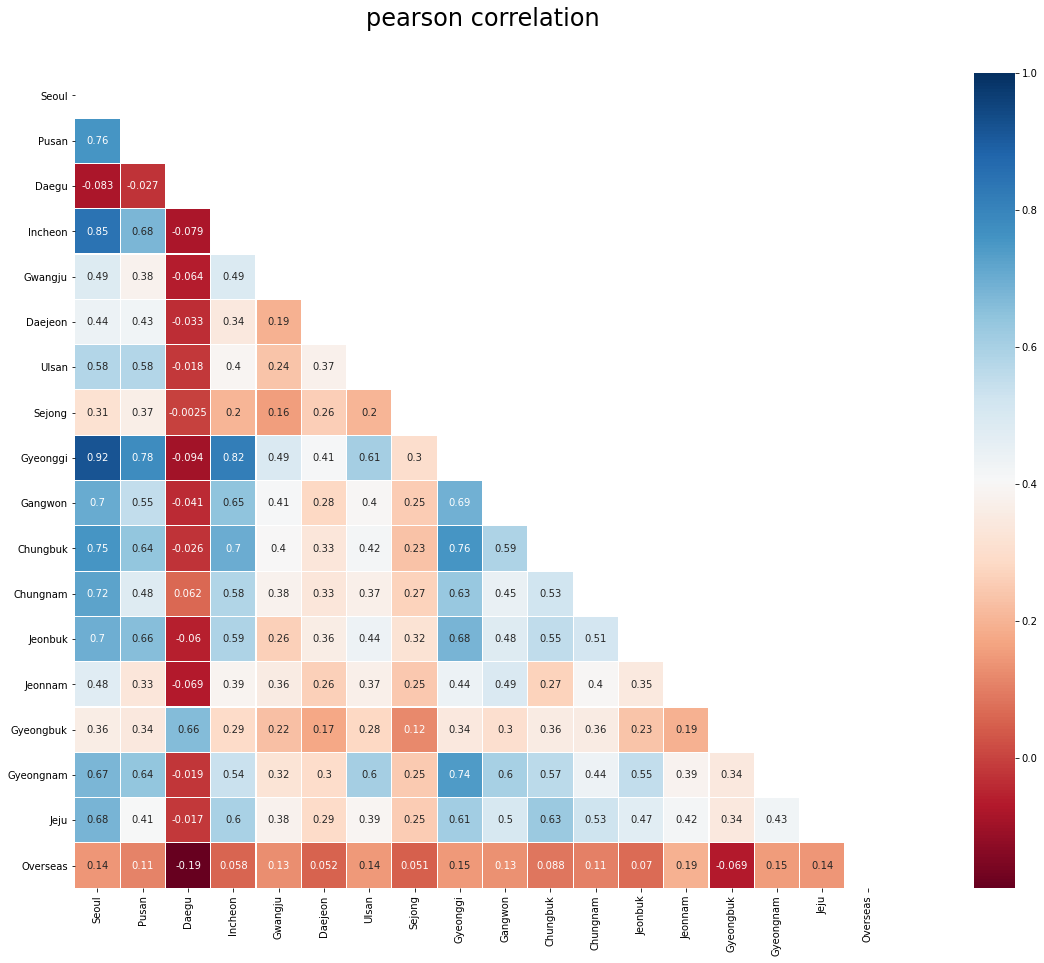

In [9]:
colormap = plt.cm.RdBu
plt.figure(figsize = (30, 15))
plt.title('pearson correlation', y = 1.05, size = 24)

mask = np.zeros_like(corr_df_scaled.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    corr_df_scaled.corr(),
    mask = mask,
    linewidths = 0.1,
    vmax = 1.0,
    square = True,
    cmap = colormap,
    linecolor = 'white',
    annot = True,
)
plt.show()

In [10]:
def corr_rank(name, data, day):

    indexes = ['Seoul', 'Pusan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan', 'Sejong', 'Gyeonggi', 'Gangwon', 'Chungbuk', 'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju', 'Overseas']

    data = data.shift(day)[:len(data)]
    data.loc[0:day-1, 'confirmed'] = data.loc[day, 'confirmed']

    corr_df = pd.DataFrame(
        {
            'Seoul': Seoul['confirmed'].values,
            'Pusan': Pusan['confirmed'].values,
            'Daegu': Daegu['confirmed'].values,
            'Incheon': Incheon['confirmed'].values,
            'Gwangju': Gwangju['confirmed'].values,
            'Daejeon': Daejeon['confirmed'].values,
            'Ulsan': Ulsan['confirmed'].values,
            'Sejong': Sejong['confirmed'].values,
            'Gyeonggi': Gyeonggi['confirmed'].values,
            'Gangwon': Gangwon['confirmed'].values,
            'Chungbuk': Chungbuk['confirmed'].values,
            'Chungnam': Chungnam['confirmed'].values,
            'Jeonbuk': Jeonbuk['confirmed'].values,
            'Jeonnam': Jeonnam['confirmed'].values,
            'Gyeongbuk': Gyeongbuk['confirmed'].values,
            'Gyeongnam': Gyeongnam['confirmed'].values,
            'Jeju': Jeju['confirmed'].values,
            'Overseas': Overseas['confirmed'].values
        })

    

    for i in indexes:
        if i == name:
            corr_df[i] = data['confirmed'].values

            """
            scale the data from 0 to 1
            """
            features = corr_df
            scaler = MinMaxScaler()
            scaler.fit(features)
            df_scaled = scaler.transform(features)
            corr_df_scaled = pd.DataFrame(data=df_scaled, columns=features.columns)
            corr_df_scaled

            """
            pearson correlation
            """
            corr = corr_df_scaled.corr(method='pearson')
            abs_data = abs(corr[i])

            """
            sort the rank of pearson correlation score
            """
            sorted_data = abs_data.sort_values(axis=0, ascending=False)

            return sorted_data


def time_difference(name, data, day):

    df = pd.DataFrame()

    for i in range(day + 1):
        df = pd.concat([df, corr_rank(name, data, i)], axis=1)

    df.plot.bar(legend=False, figsize=(15,7))

In [13]:
corr_rank('Seoul', Seoul, 0)

Seoul        1.000000
Gyeonggi     0.920078
Incheon      0.845608
Pusan        0.755725
Chungbuk     0.754542
Chungnam     0.721232
Gangwon      0.703694
Jeonbuk      0.695086
Jeju         0.679589
Gyeongnam    0.674949
Ulsan        0.580172
Gwangju      0.488170
Jeonnam      0.475584
Daejeon      0.440910
Gyeongbuk    0.360684
Sejong       0.314825
Overseas     0.142547
Daegu        0.082922
Name: Seoul, dtype: float64

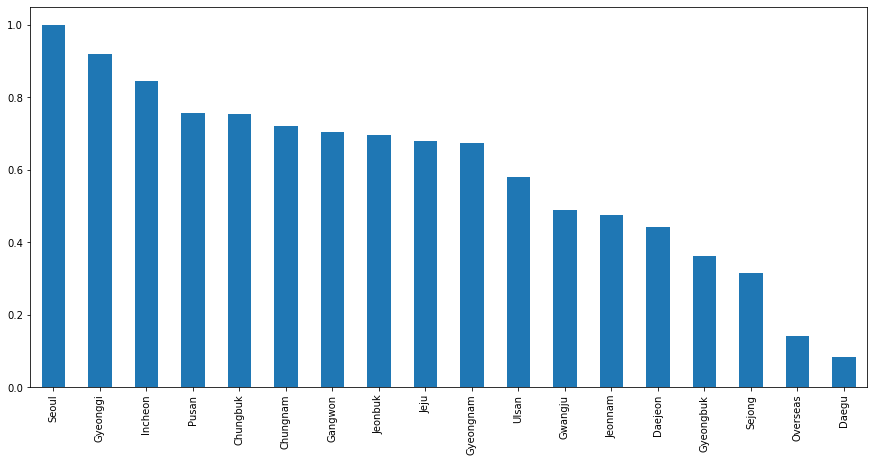

In [14]:
time_difference('Seoul', Seoul, 0) # 증가하는 지표는 target data에 의해 영향을 받게 되는 것

## time difference 30 days

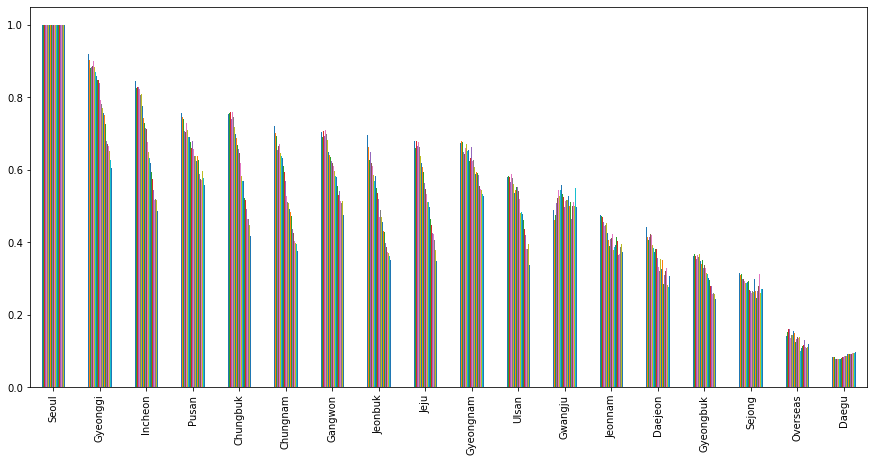

In [16]:
time_difference('Seoul', Seoul, 30) # 증가하는 지표는 target data에 의해 영향을 받게 되는 것

## from overseas

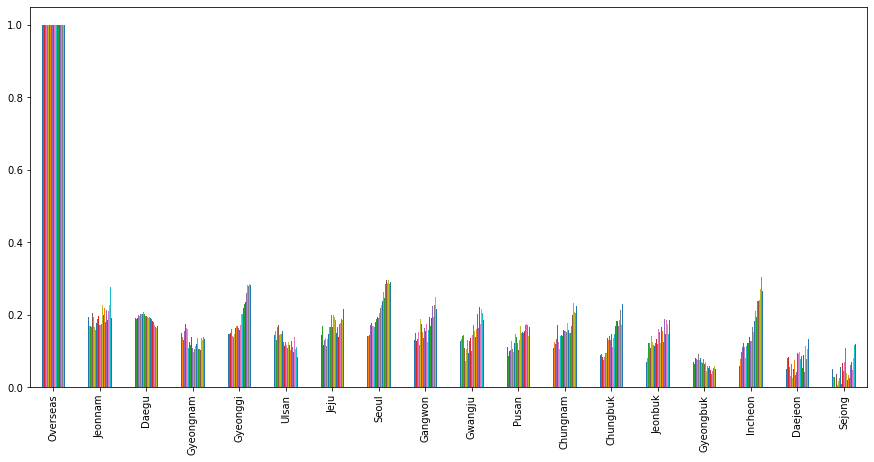

In [17]:
time_difference('Overseas', Overseas, 30) # 증가하는 지표는 target data에 의해 영향을 받게 되는 것